<a href="https://colab.research.google.com/github/ranjith13119/ML-and-DataScience/blob/main/XGB_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Titani-kaggle/train.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

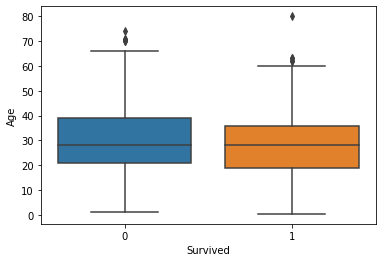

In [ ]:
sns.boxplot(x = df.Survived, y = df.Age)

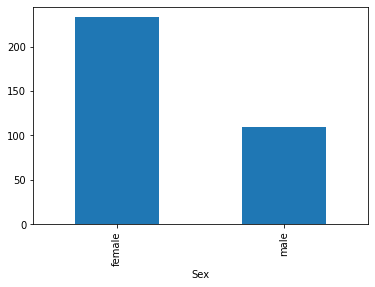

In [ ]:
df.groupby('Sex').agg('sum')['Survived'].plot(kind = 'bar', stacked=True)

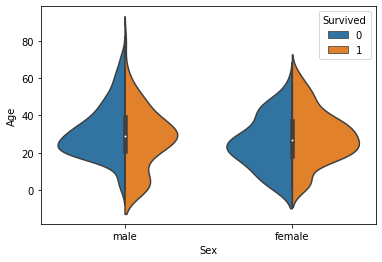

In [ ]:
sns.violinplot(x='Sex', y='Age', hue = 'Survived', data = df, split = True)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'No. of Passanger')

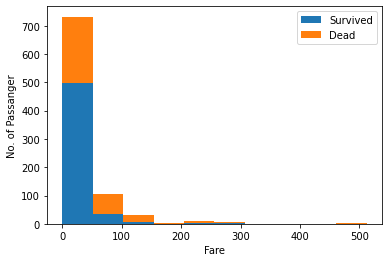

In [ ]:
plt.hist([df[df.Survived == 0]['Fare'], df[df.Survived == 1].Fare],stacked = True, label = ['Survived', 'Dead'])
plt.legend()
plt.xlabel('Fare')
plt.ylabel('No. of Passanger')

In [ ]:
df.drop(['Name','Cabin', 'Ticket'], axis = 1, inplace= True)

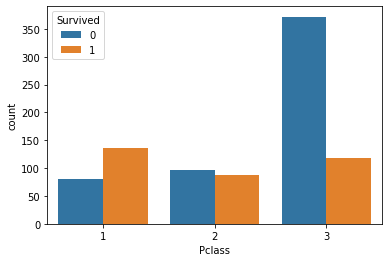

In [ ]:
sns.countplot(x=df.Pclass, hue = df.Survived)

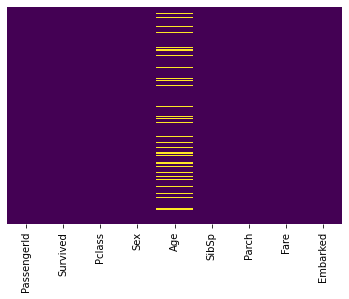

In [ ]:
sns.heatmap(data = df.isnull(), yticklabels = False, cbar = False, cmap='viridis')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


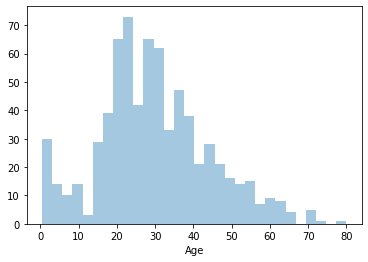

In [ ]:
sns.distplot(df["Age"].dropna(), kde = False, bins = 30)

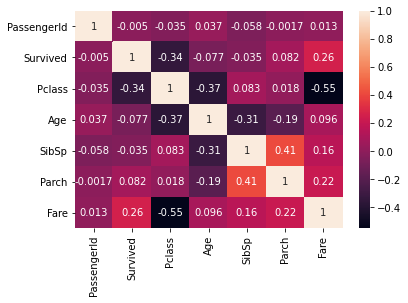

In [ ]:
sns.heatmap(df.corr(), annot = True) 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


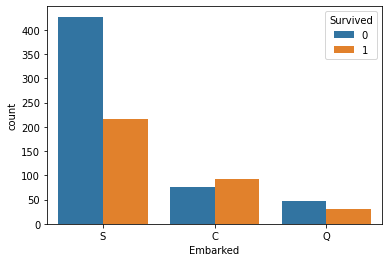

In [ ]:
sns.countplot(df.Embarked, hue=df.Survived)

In [ ]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace=True)

In [ ]:
df.Age.fillna(df.Age.median(), inplace = True)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
#creating Scoring parameter: 
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall':make_scorer(recall_score)}


In [ ]:
df.drop(['PassengerId'], inplace= True, axis = 1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:
y = df["Survived"].values
X = df.iloc[:, 1:].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

In [ ]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()

In [ ]:
n_estimators = [int(x) for x in np.linspace(200, 2000, 10)]
# number of feature to be consider at every split
max_features = ['auto', 'sqrt', 'log2']

#Max number of levels in tree
max_depth = [int(x) for x in np.linspace(10 , 1000, 10)]
min_samples_split = [1, 3, 4, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]

parameters_xgb = {
      "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
      "min_samples_split": min_samples_split,
      "min_samples_leaf": min_samples_leaf,
      "max_depth": max_depth, 
      "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
      "n_estimators": n_estimators,
      'criterion' : ['entropy', 'gini']
    }
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall':make_scorer(recall_score)}
print(parameters_xgb)

{'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2], 'min_samples_split': [1, 3, 4, 5, 7, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'subsample': [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'criterion': ['entropy', 'gini']}


In [ ]:
clf_xgb = RandomizedSearchCV(estimator = xgb, scoring=scoring , refit=False, param_distributions = parameters_xgb, n_iter = 100, cv=3, n_jobs = -1, verbose = 2, random_state=100)

In [ ]:
clf_xgb

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                        'min_samples_split': [1, 3, 4, 5, 7, 9],
                                        'n_estimators': [200, 400, 600, 800,
                   

In [ ]:
clf_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                        'min_samples_split': [1, 3, 4, 5, 7, 9],
                                        'n_estimators': [200, 400, 600, 800,
                   

In [ ]:
# clf_xgb.best_params_

df1=pd.DataFrame.from_dict(clf_xgb.cv_results_)
df1

#here Possible inputs for cross validation is cv=2, there two split split0 and split1
df1[['split0_test_accuracy','split1_test_accuracy', 'split2_test_accuracy', 'split0_test_precision','split1_test_precision', 'split2_test_precision',
      'split0_test_recall','split1_test_recall', 'split2_test_recall']]
df1['accuracy_score']=(df1['split0_test_accuracy']+df1['split1_test_accuracy'] + df1['split2_test_accuracy'])/3

df1.loc[df1['accuracy_score'].idxmax()]['params'] 

{'criterion': 'entropy',
 'learning_rate': 0.025,
 'max_depth': 780,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 200,
 'subsample': 0.618}

In [ ]:
#clf_xgb.best_estimator_

In [ ]:
# xgb_bset = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1, criterion='entropy',
#               gamma=0, learning_rate=0.025, max_delta_step=0, max_depth=780,
#               min_child_weight=1, min_samples_leaf=1, min_samples_split=7,
#               missing=None, n_estimators=200, n_jobs=1, nthread=None,
#               objective='binary:logistic', random_state=0, reg_alpha=0,
#               reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
#               subsample=0.618, verbosity=1)


xgb_bset = XGBClassifier(
      criterion =  'entropy',
      learning_rate =  0.025,
      max_depth = 780,
      min_samples_leaf = 1,
      min_samples_split =  7,
      n_estimators = 200,
      subsample =  0.618)


In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb_bset,  X_train, y_train, cv=10)

In [ ]:
score.mean()

0.8259389671361502

In [ ]:
xgb_bset.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='entropy',
              gamma=0, learning_rate=0.025, max_delta_step=0, max_depth=780,
              min_child_weight=1, min_samples_leaf=1, min_samples_split=7,
              missing=None, n_estimators=200, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.618, verbosity=1)

In [ ]:
Prediction = xgb_bset.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, Prediction))

[[97 13]
 [23 46]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Prediction))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       110
           1       0.78      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179



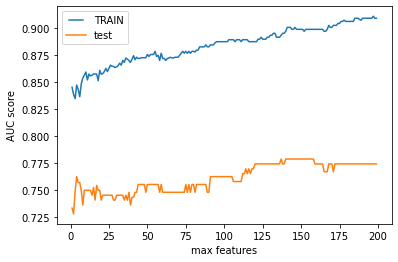

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc
train_results = []
test_results = []
#max_feature = list(range(1,X_train.shape[1]))
max_feature = list(range(1, 200))
for i in max_feature:
  clf_best = XGBClassifier(
      criterion =  'entropy',
      learning_rate =  0.025,
      max_depth = 780,
      min_samples_leaf = 1,
      min_samples_split =  7,
      n_estimators = i,
      subsample =  0.618
      )
  clf_best.fit(X_train, y_train)
  train_pred = clf_best.predict(X_train)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)
  y_pred = clf_best.predict(X_test)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_feature, train_results, label = "TRAIN")
line2, = plt.plot(max_feature, test_results, label = "test")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

               

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfC = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rfC, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=60, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfC_bset = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
rfC_bset.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
Prediction = rfC_bset.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Prediction))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, Prediction))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       110
           1       0.80      0.68      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179

[[98 12]
 [22 47]]
